In [1]:
import torch
from torchvision import transforms
from torchvision.io import read_image
import cv2
import os
import glob
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
%matplotlib inline
plt.style.use('bmh')
torch.manual_seed(18)
torch.set_default_tensor_type('torch.FloatTensor')
g_cuda = torch.Generator(device='cuda')

In [2]:
# ! mkdir augmented 
# ! mkdir L
# ! mkdir a
# ! mkdir b
# ! mkdir oriimge

In [3]:
# load data
def load_img_folder(img_dir):
    files = glob.glob(img_dir)
    data = []
    for f1 in files:
        img = read_image(f1)
        data.append(img)
    tensor_data = torch.stack(data,dim = 0)
#     tensor_data = tensor_data[torch.randperm(750)]    
    return tensor_data

In [4]:
# 750 * 3 * 128 * 128 
face_data = load_img_folder("/home/f.yang1/CAP5404/Part2/face_images/*.jpg")

In [5]:
# Augment
trans = transforms.Compose([
    transforms.RandomResizedCrop(size=[128],scale=(0.6,1)),
    transforms.RandomHorizontalFlip(p = 0.5),
])

In [6]:
for i,face_img in enumerate(face_data):
    cv2.imwrite("oriimge/images{}.jpg".format(i),cv2.cvtColor(np.transpose(face_img.numpy(),[1,2,0]),cv2.COLOR_BGR2RGB))        
    for j in range(10):
        trans_img = trans(face_img)
        np_face_img = trans_img.numpy()
        np_face_img = np.transpose(np_face_img,[1,2,0])
        img = cv2.cvtColor(np_face_img, cv2.COLOR_BGR2LAB)
        L,a,b=cv2.split(img)
        cv2.imwrite("L/L_images{}aug{}.jpg".format(i,j),L)
        cv2.imwrite("a/a_images{}aug{}.jpg".format(i,j),a)    
        cv2.imwrite("b/b_images{}aug{}.jpg".format(i,j),b)    
        np_face_img = cv2.cvtColor(np.asarray(np_face_img), cv2.COLOR_BGR2RGB)
        cv2.imwrite("augmented/images{}aug{}.jpg".format(i,j),np_face_img)

In [13]:
plt.rcParams["savefig.bbox"] = 'tight'
showing = []
files = glob.glob("/home/f.yang1/CAP5404/Part2/showimgdir/*.jpg")
files = files[:-3] + files[-2:]  
for f1 in files:
    img = Image.open(f1)
    showing.append(img)

orig_img = Image.open("showimgdir/img0.jpg")
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    fig.set_figheight(10)
    fig.set_figwidth(30)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(20)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()   

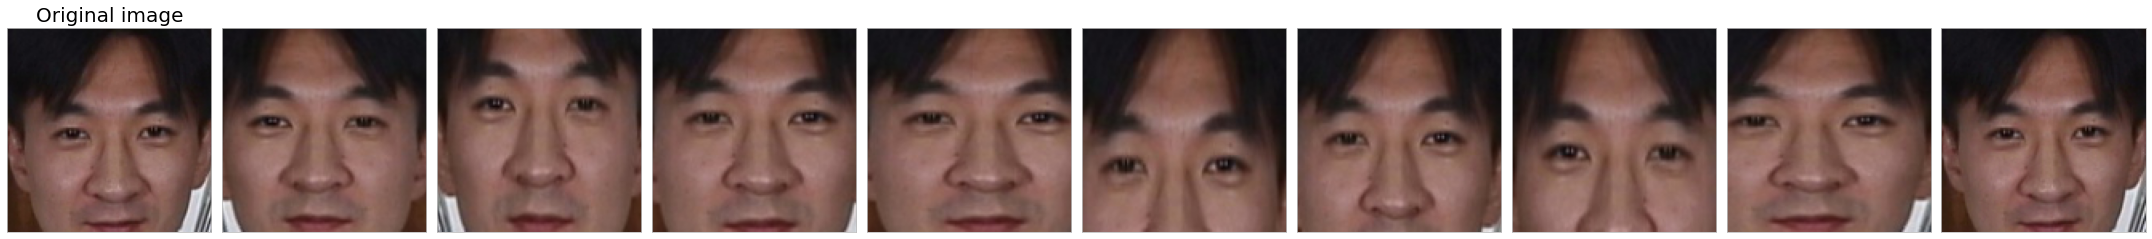

In [14]:
plot(showing[0:9])

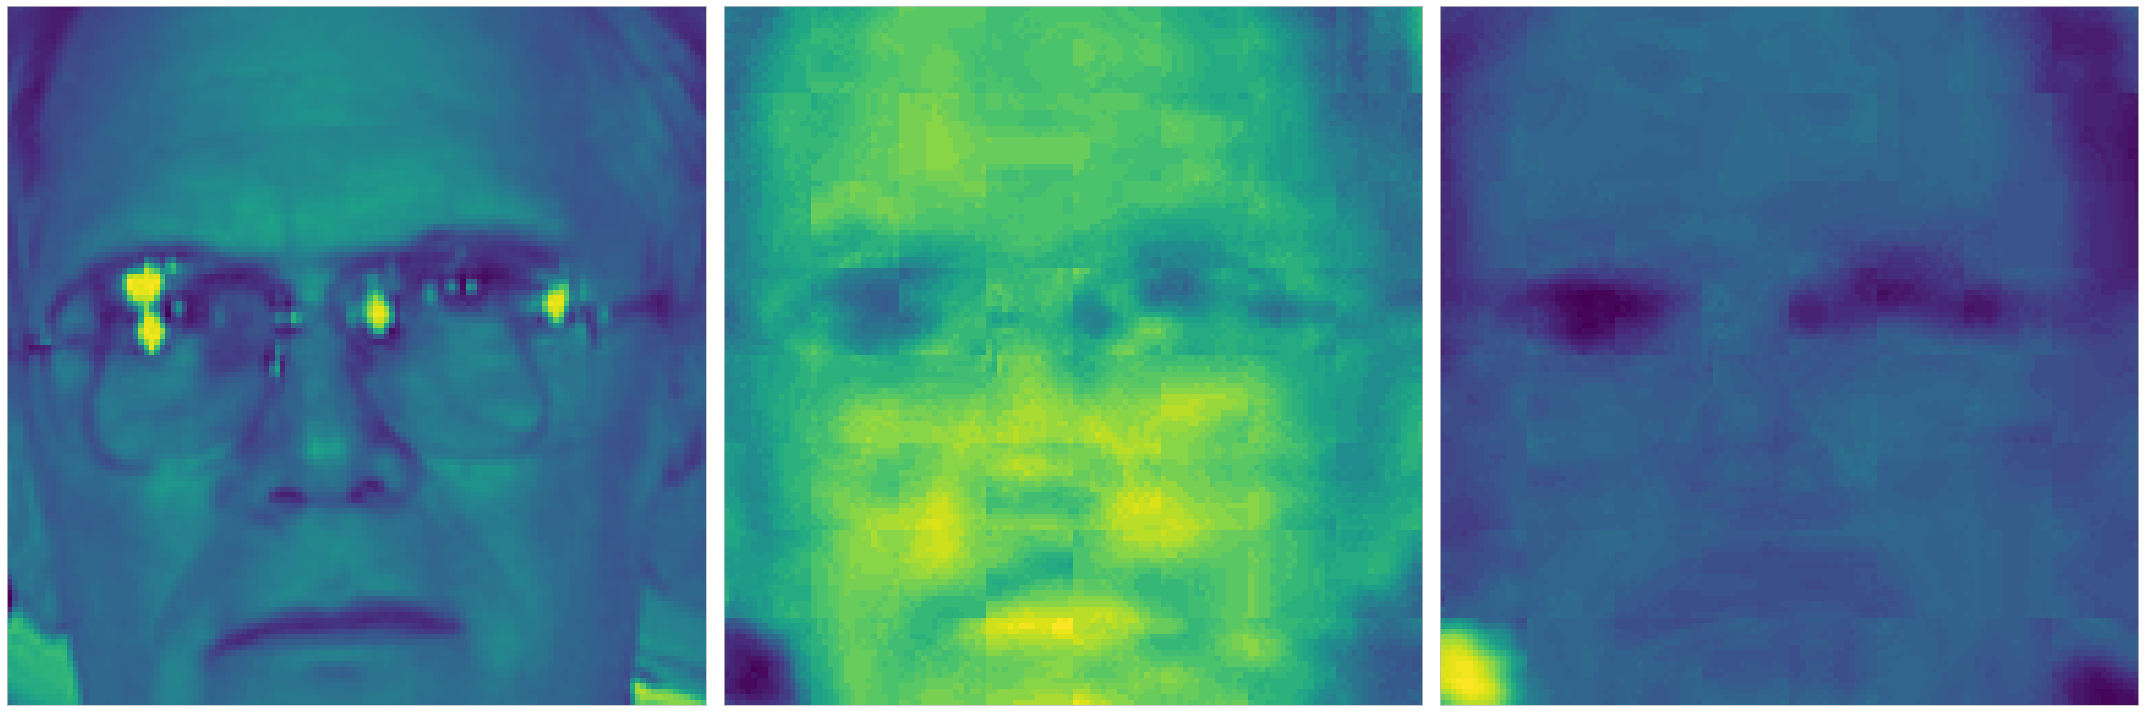

In [9]:
img = cv2.imread("showimgdir/lab.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
L,a,b=cv2.split(img)
showing = [L,a,b]
plot(showing, with_orig=False)

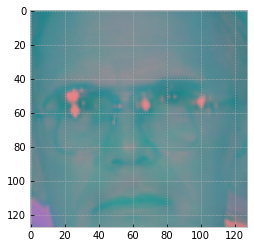

In [10]:
plt.imshow(img)

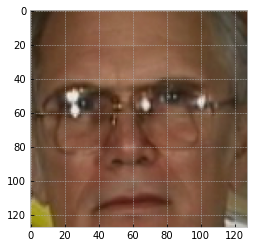

In [11]:
img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
plt.imshow(img)